# **Import библиотек**

In [92]:
import pandas as pd
from google.colab import files 
from google.colab import drive

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# **QUESTIONS.CSV: METADATA FOR THE QUESTIONS POSED TO USERS**

## **Загрузка данных на Google Drive**

In [2]:
uploaded = files.upload()

Saving questions.csv to questions.csv


## **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [3]:
df_q = pd.read_csv('/content/questions.csv', delimiter = ',')
df_q.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


**questions.csv**: metadata for the questions posed to users.  
**question_id**: foreign key for the train/test content_id column, when the content type is question (0).  
**bundle_id**: code for which questions are served together.  
**correct_answer**: the answer to the question. Can be compared with the train user_answer column to check if the user was right.  
**part**: the relevant section of the TOEIC test.  
**tags**: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.

## **EDA - Разведывательный анализ данных**

In [4]:
df_q.info() # общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


Найдем категориальные и численные столбцы

In [5]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df_q.columns:
    if (df_q[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['tags'] 
 Число столблцов =  1
Числовые данные:	  ['question_id', 'bundle_id', 'correct_answer', 'part'] 
 Число столблцов =  4


## **Анализ числовых признаков**

In [6]:
df_q.describe() # выводим информацию о числовых столбцах

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


## **Визуализация данных с использованием библиотеки Pandas**

<Figure size 2160x2160 with 0 Axes>

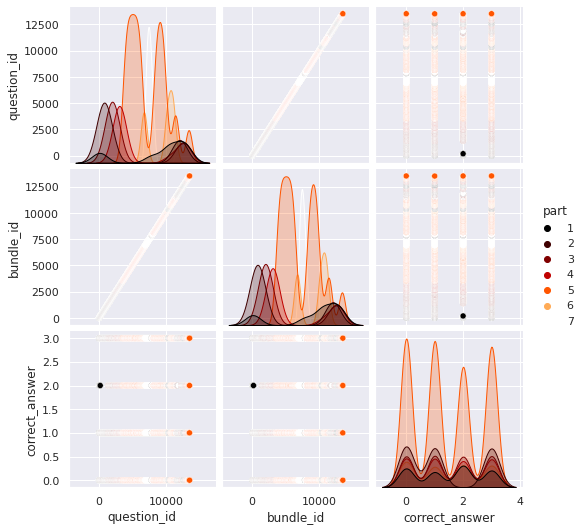

In [7]:
# построим  график зависимости показателей друг от друга
fig = plt.figure(figsize=(30,30))
sns.pairplot(data = df_q, 
             hue ='part',
             palette = 'gist_heat');

На графике видно, что показатель question_id и bundle_id имеет одинаковое распределение между разделами (part)

In [8]:
# Выводим кол-во значений внешних ключей, соответствующих каждому значению в столбце разделов
df_q[['part', 'question_id']].groupby(['part'], as_index = False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


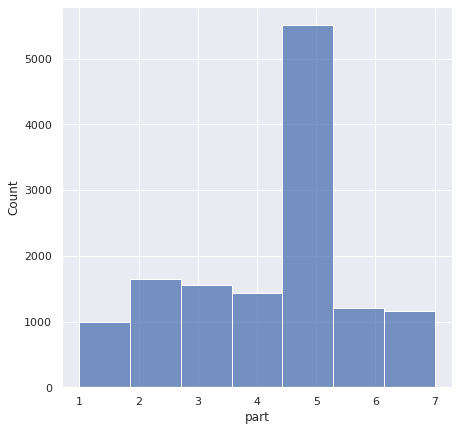

In [9]:
# посмотроим график распределения количества внешних ключей (question_id) между разделами
plt.figure(figsize=(7,7))
sns.histplot(data=df_q,
            x='part', bins = 7);

В 5 разделе (part) значительный рост количества внешних ключей (question_id) , тогда как между остальными разделами ключи распределены равномерно

# **LECTURES.CSV: METADATA FOR THE LECTURES WATCHED BY USERS AS THEY PROGRESS IN THEIR EDUCATION**

## **Загрузка данных на Google Drive**

In [10]:
uploaded = files.upload()

Saving lectures.csv to lectures.csv


*lectures.csv*: metadata for the lectures watched by users as they progress in their education.  
*lecture_id*: foreign key for the train/test content_id column, when the content type is lecture (1).  
*part*: top level category code for the lecture.  
*tag*: one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together.  
*type_of*: brief description of the core purpose of the lecture.  

## **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [11]:
df_l = pd.read_csv('/content/lectures.csv', delimiter = ',')
df_l

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


## **EDA - Разведывательный анализ данных**

In [12]:
df_l.info() # общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


Найдем категориальные и численные столбцы

In [13]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df_l.columns:
    if (df_l[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['type_of'] 
 Число столблцов =  1
Числовые данные:	  ['lecture_id', 'tag', 'part'] 
 Число столблцов =  3


## **Анализ числовых признаков**


In [14]:
df_l.describe() # выводим информацию о числовых столбцах

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [15]:
# Выводим кол-во значений lecture_id, соответствующих каждому значению в столбце разделов
df_l[['part', 'lecture_id']].groupby(['part'], as_index = False).count()

,part,lecture_id
0,1,54
1,2,56
2,3,19
3,4,31
4,5,143
5,6,83
6,7,32


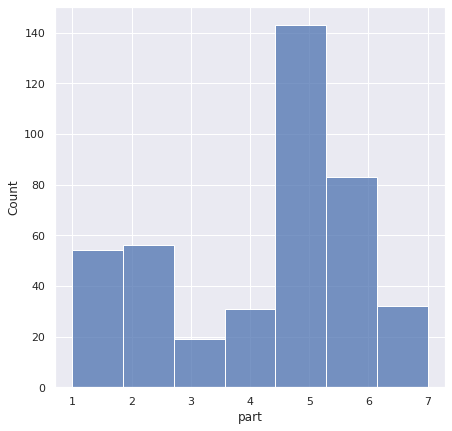

In [16]:
# посмотроим график распределения количества lecture_id  между разделами
plt.figure(figsize=(7,7))
sns.histplot(data=df_l,
            x='part', bins = 7);

lecture_id  между разделами (part)  распределены неравномерно, значительный рост показателя lecture_id  в разеделе 5

## **Визуализация данных с использованием библиотеки Pandas**

<Figure size 2160x2160 with 0 Axes>

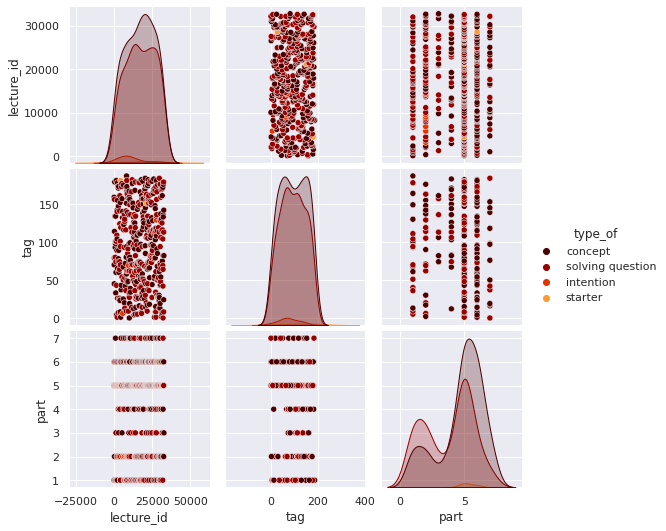

In [23]:
# построим  график зависимости показателей друг от друга
fig = plt.figure(figsize=(30,30))
sns.pairplot(data = df_l, 
             hue ='type_of',
             palette = 'gist_heat');

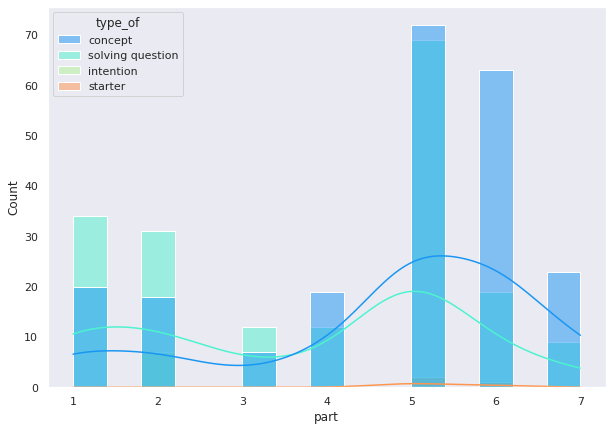

In [28]:
# Построим гистограмму тем лекций (type of) по разделам (part)
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_l,
             x = 'part',
             hue = 'type_of',
             bins = 15, kde = True,
             palette='rainbow')


 Судя по графику ,  в 3-х разделах преобладает тема solving problem,  в 5-7  основной акцент на concept

In [59]:
# Выводим распределение lecture_id по различным разделам  и темам лекций
df_l[['type_of', 'part', 'lecture_id']].groupby(['part','type_of'], as_index = False).count().sort_values(by = ['part','type_of'])


,part,type_of,lecture_id
0,1,concept,20
1,1,solving question,34
2,2,concept,18
3,2,intention,7
4,2,solving question,31
5,3,concept,7
6,3,solving question,12
7,4,concept,19
8,4,solving question,12
9,5,concept,72


# **TRAIN.CSV**

## **Загрузка данных на Google Drive**

Выполняем следующий код с целью подключения Goodle Диска

In [133]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [134]:
df_train = pd.read_csv('/content/gdrive/MyDrive/train.csv', nrows = 250000)
df_train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
249995,249995,10889109817,4702585,5323,0,11,0,0,24000.0,True
249996,249996,10889142105,4702585,5038,0,12,3,0,18000.0,True
249997,249997,10889171007,4702585,3733,0,13,0,0,25000.0,True
249998,249998,10889287894,4702585,9803,0,14,0,0,23000.0,True


**row_id**: (int64) ID code for the row.  
**timestamp**: (int64) the time in milliseconds between this user interaction and the first event completion from that user.  
**user_id**: (int32) ID code for the user.  
**content_id**: (int16) ID code for the user interaction  
**content_type_id**: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.  
**task_container_id**: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.  
**user_answer**: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.
**answered_correctly**: (int8) if the user responded correctly. Read -1 as null, for lectures.  
**prior_question_elapsed_time**: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.  
**prior_question_had_explanation**: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.  

## **EDA - Разведывательный анализ данных.**

In [135]:
df_train.info() # общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          250000 non-null  int64  
 1   timestamp                       250000 non-null  int64  
 2   user_id                         250000 non-null  int64  
 3   content_id                      250000 non-null  int64  
 4   content_type_id                 250000 non-null  int64  
 5   task_container_id               250000 non-null  int64  
 6   user_answer                     250000 non-null  int64  
 7   answered_correctly              250000 non-null  int64  
 8   prior_question_elapsed_time     244475 non-null  float64
 9   prior_question_had_explanation  249153 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 19.1+ MB


Найдем категориальные и численные столбцы

In [136]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df_train.columns:
    if (df_train[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столблцов =  1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столблцов =  9


## **Анализ числовых признаков**

In [137]:
df_train.describe() # выводим информацию о числовых столбцах

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,250000.000000,2.500000e+05,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,244475.000000
mean,124999.500000,7.844518e+09,2.562026e+06,5209.862540,0.018712,919.189744,1.381924,0.646296,25285.600986
std,72168.927986,1.087706e+10,1.403104e+06,3900.241928,0.135506,1086.668019,1.193077,0.515774,18504.618365
min,0.000000,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,62499.750000,7.475547e+08,1.375288e+06,1921.000000,0.000000,126.000000,0.000000,0.000000,16000.000000
50%,124999.500000,3.637694e+09,2.641711e+06,5006.000000,0.000000,460.000000,1.000000,1.000000,21000.000000
75%,187499.250000,1.128834e+10,3.838215e+06,7508.000000,0.000000,1360.000000,3.000000,1.000000,29000.000000
max,249999.000000,7.809200e+10,4.702585e+06,32736.000000,1.000000,5630.000000,3.000000,1.000000,300000.000000


## **Визуализация данных с использованием библиотеки Pandas**

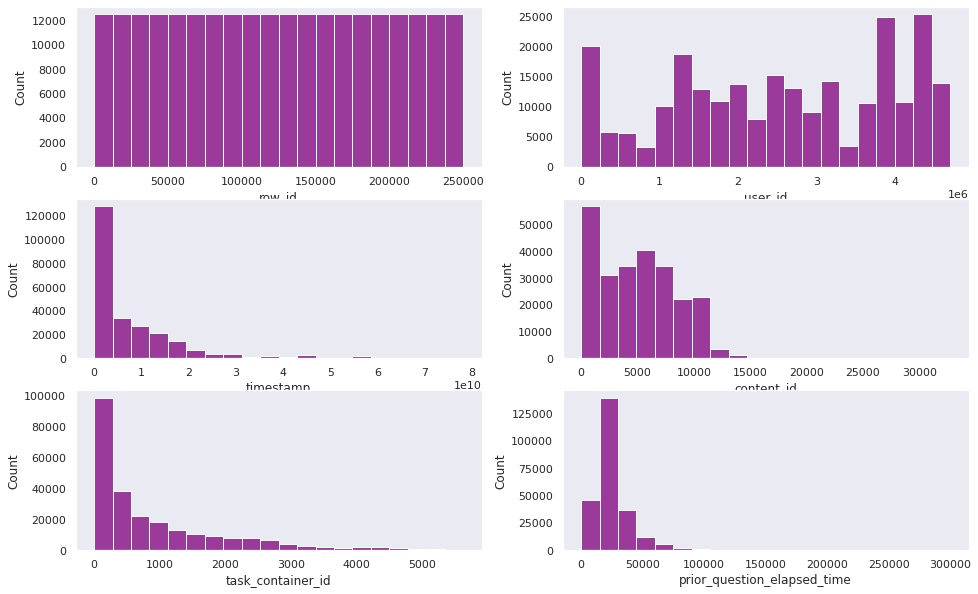

In [138]:
# строим гистограмму для числовых данных показателей row_id, timestamp,user_id, content_id, task_container_id, prior_question_elapsed_time
num_col = ['row_id',  'user_id','timestamp', 'content_id', 'task_container_id', 'prior_question_elapsed_time']
width = 2
height = int(np.ceil(len(num_col)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,10))
sns.set_style('dark')

for idx, column_name in enumerate(num_col):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df_train,
            x=column_name, bins = 20,color = "purple");


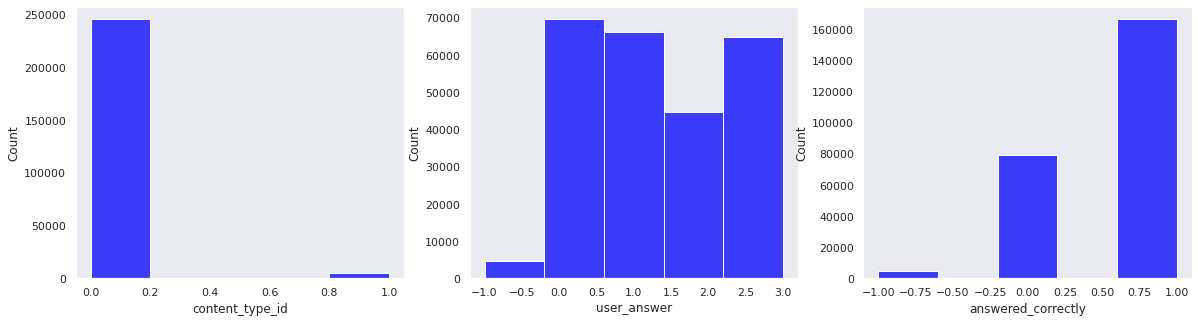

In [139]:
# строим гистограмму для числовых данных показателей 'content_type_id', 'user_answer', 'answered_correctly'
num_col_2 = ['content_type_id', 'user_answer', 'answered_correctly']
width = 3
height = int(np.ceil(len(num_col_2)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,5))
sns.set_style('dark')

for idx, column_name in enumerate(num_col_2):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df_train,
            x=column_name, bins = 5,color = "blue");

## **Анализ признаков, влияющих на успеваюмость**

In [140]:
# Добавляем столбец success_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)
df_train['success_ratio'] = df_train.answered_correctly / df_train.user_answer
# Выведем новую корреляцию числовых признаков

df_train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,success_ratio
0,0,0,115,5692,0,1,3,1,NaN,NaN,0.333333
1,1,56943,115,5716,0,2,2,1,37000.0,False,0.500000
2,2,118363,115,128,0,0,0,1,55000.0,False,inf
3,3,131167,115,7860,0,3,0,1,19000.0,False,inf
4,4,137965,115,7922,0,4,1,1,11000.0,False,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
249995,249995,10889109817,4702585,5323,0,11,0,0,24000.0,True,NaN
249996,249996,10889142105,4702585,5038,0,12,3,0,18000.0,True,0.000000
249997,249997,10889171007,4702585,3733,0,13,0,0,25000.0,True,NaN
249998,249998,10889287894,4702585,9803,0,14,0,0,23000.0,True,NaN


Посмотрим на корреляцию численных столбцов

In [141]:
cm = sns.color_palette("vlag", as_cmap=True)
df_train_corr = df_train.loc[:,['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time','success_ratio']]
df_train_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,success_ratio
timestamp,1.000000,0.087399,0.033810,0.006046,0.409156,-0.000729,0.035556,-0.004459,0.036012
user_id,0.087399,1.000000,0.016223,0.000898,0.023308,-0.000649,-0.004287,0.024937,-0.001822
content_id,0.033810,0.016223,1.000000,0.404898,0.053273,-0.101107,-0.187463,0.153833,0.076873
content_type_id,0.006046,0.000898,0.404898,1.000000,-0.019298,-0.275691,-0.440769,nan,0.237336
task_container_id,0.409156,0.023308,0.053273,-0.019298,1.000000,0.008528,0.081470,-0.037224,0.057147
user_answer,-0.000729,-0.000649,-0.101107,-0.275691,0.008528,1.000000,0.126113,0.014263,-0.542482
answered_correctly,0.035556,-0.004287,-0.187463,-0.440769,0.081470,0.126113,1.000000,-0.009082,0.526485
prior_question_elapsed_time,-0.004459,0.024937,0.153833,nan,-0.037224,0.014263,-0.009082,1.000000,-0.017322
success_ratio,0.036012,-0.001822,0.076873,0.237336,0.057147,-0.542482,0.526485,-0.017322,1.000000


In [142]:
#Удалим столбы не влиящие на успеваемость
df_train_corr.drop(df_train_corr.columns[[0, 1, 2, 4, 7]], axis = 1, inplace = True)
# Выведем обновлённую корреляцию числовых признаков
df_train_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly,success_ratio
content_type_id,1.000000,-0.275691,-0.440769,0.237336
user_answer,-0.275691,1.000000,0.126113,-0.542482
answered_correctly,-0.440769,0.126113,1.000000,0.526485
success_ratio,0.237336,-0.542482,0.526485,1.000000


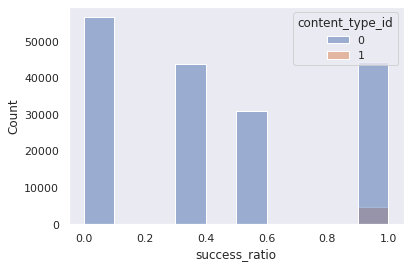

In [143]:
# Выводим распределение успеваваемости студентов
sns.histplot(data = df_train_corr, x = 'success_ratio', hue = 'content_type_id', bins = 10)

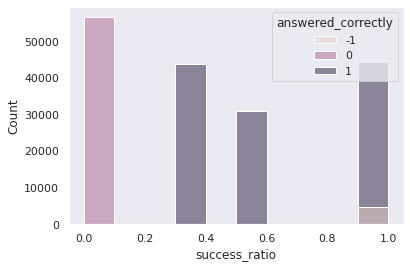

In [144]:
# Выводим распределение успеваваемости студентов
sns.histplot(data = df_train_corr, x = 'success_ratio', hue = 'answered_correctly', bins = 10)

Из графика видно, что  успеваемость слабо зависит от показателя content_type_id, и конечно же влиет answered correctly

Рассмотрим статистику ответов студентов

In [145]:
df_train.agg({'user_id': pd.Series.nunique}) # ищем кол-во уникальных идентификаторов студента

user_id    849
dtype: int64

In [153]:
# Группируем общее кол-во ответов и кол-во правильных ответов каждого студента по его идентификатору в датафрейм df_train_by_user
df_train_by_user= df_train[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
df_train_by_user

,user_id,user_answer,answered_correctly
0,115,72,32
1,124,49,7
2,2746,31,10
3,5382,169,81
4,8623,149,67
...,...,...,...
844,4679108,54,14
845,4688030,32,11
846,4699603,40,19
847,4700718,589,236


Визуализируем данные о количестве ответов студентов

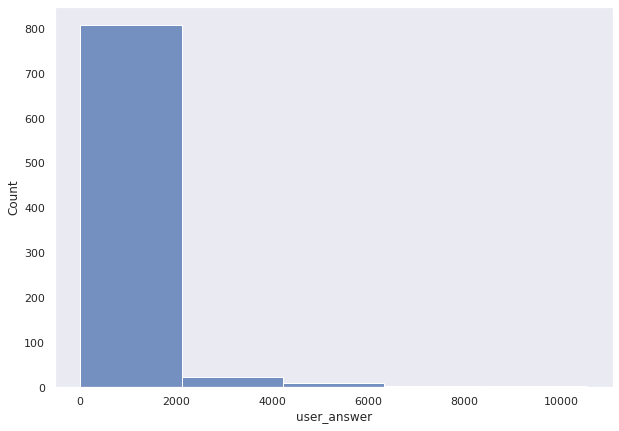

In [150]:
# посмотроим график
plt.figure(figsize=(10,7))
sns.histplot(data=df_train_by_user,
            x='user_answer', bins = 5);

In [156]:
# Группируем общее кол-во ответов, кол-во правильных ответов и время ответа на каждый вопрос студентов по их идентификаторам в датафрейм df_train_by_user_id
df_train_by_user_id = df_train[['user_id', 'user_answer', 'answered_correctly', 'timestamp', 
    'prior_question_elapsed_time']].groupby(['user_id'], as_index = False).sum()
df_train_by_user_id

,user_id,user_answer,answered_correctly,timestamp,prior_question_elapsed_time
0,115,72,32,4697739217,896999.0
1,124,49,7,11035797,544997.0
2,2746,31,10,7663581,325000.0
3,5382,169,81,48656798787,4470000.0
4,8623,149,67,38974674655,2819600.0
...,...,...,...,...,...
844,4679108,54,14,513770399,372000.0
845,4688030,32,11,9254537,788000.0
846,4699603,40,19,18329472,556998.0
847,4700718,589,236,393522432111,13696578.0


In [157]:
# Добавляем столбец timestamp_ratio соотношения времени timestamp к user_answer
df_train_by_user_id ['timestamp_ratio'] = df_train_by_user_id ['timestamp'] / df_train_by_user_id ['user_answer']
df_train_by_user_id

,user_id,user_answer,answered_correctly,timestamp,prior_question_elapsed_time,timestamp_ratio
0,115,72,32,4697739217,896999.0,6.524638e+07
1,124,49,7,11035797,544997.0,2.252203e+05
2,2746,31,10,7663581,325000.0,2.472123e+05
3,5382,169,81,48656798787,4470000.0,2.879101e+08
4,8623,149,67,38974674655,2819600.0,2.615750e+08
...,...,...,...,...,...,...
844,4679108,54,14,513770399,372000.0,9.514267e+06
845,4688030,32,11,9254537,788000.0,2.892043e+05
846,4699603,40,19,18329472,556998.0,4.582368e+05
847,4700718,589,236,393522432111,13696578.0,6.681196e+08


In [158]:
# Добавляем столбец elapsed_time_ratio соотношения среднего времени ответа на каждый вопрос к общему user_answer
df_train_by_user_id['elapsed_time_ratio'] = df_train_by_user_id['prior_question_elapsed_time'] / df_train_by_user_id['user_answer']
df_train_by_user_id

,user_id,user_answer,answered_correctly,timestamp,prior_question_elapsed_time,timestamp_ratio,elapsed_time_ratio
0,115,72,32,4697739217,896999.0,6.524638e+07,12458.319444
1,124,49,7,11035797,544997.0,2.252203e+05,11122.387755
2,2746,31,10,7663581,325000.0,2.472123e+05,10483.870968
3,5382,169,81,48656798787,4470000.0,2.879101e+08,26449.704142
4,8623,149,67,38974674655,2819600.0,2.615750e+08,18923.489933
...,...,...,...,...,...,...,...
844,4679108,54,14,513770399,372000.0,9.514267e+06,6888.888889
845,4688030,32,11,9254537,788000.0,2.892043e+05,24625.000000
846,4699603,40,19,18329472,556998.0,4.582368e+05,13924.950000
847,4700718,589,236,393522432111,13696578.0,6.681196e+08,23253.952462


In [160]:
# Добавляем столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)
df_train_by_user_id['succsess_ratio'] = df_train_by_user_id.answered_correctly / df_train_by_user_id.user_answer
df_train_by_user_id

,user_id,user_answer,answered_correctly,timestamp,prior_question_elapsed_time,timestamp_ratio,elapsed_time_ratio,succsess_ratio
0,115,72,32,4697739217,896999.0,6.524638e+07,12458.319444,0.444444
1,124,49,7,11035797,544997.0,2.252203e+05,11122.387755,0.142857
2,2746,31,10,7663581,325000.0,2.472123e+05,10483.870968,0.322581
3,5382,169,81,48656798787,4470000.0,2.879101e+08,26449.704142,0.479290
4,8623,149,67,38974674655,2819600.0,2.615750e+08,18923.489933,0.449664
...,...,...,...,...,...,...,...,...
844,4679108,54,14,513770399,372000.0,9.514267e+06,6888.888889,0.259259
845,4688030,32,11,9254537,788000.0,2.892043e+05,24625.000000,0.343750
846,4699603,40,19,18329472,556998.0,4.582368e+05,13924.950000,0.475000
847,4700718,589,236,393522432111,13696578.0,6.681196e+08,23253.952462,0.400679


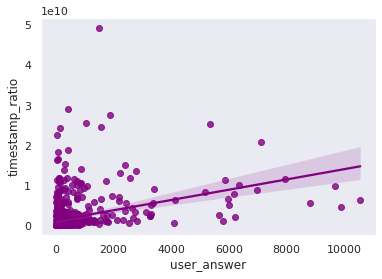

In [162]:
# Выводим соотношение timestamp_ratio к кол-ву ответов студентов: явной связи не видно
sns.regplot(data = df_train_by_user_id, x = 'user_answer', y = 'timestamp_ratio', color = 'purple')

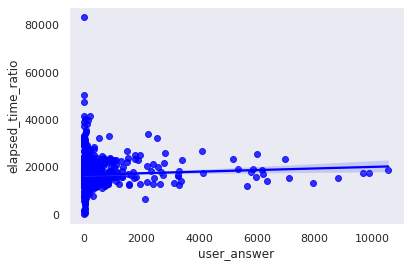

In [164]:
# Выводим соотношение elapsed_time_ratio к кол-ву ответов студентов: явной связи не видно
sns.regplot(data = df_train_by_user_id, x = 'user_answer', y = 'elapsed_time_ratio', color = 'blue')

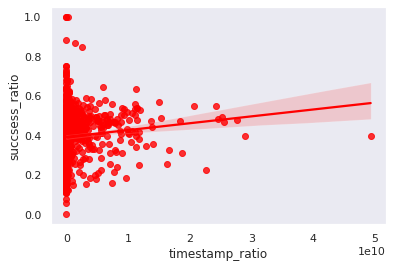

In [169]:
# Выводим соотношение timestamp_ratio к успеваемости: явной связи не видно
sns.regplot(data = df_train_by_user_id, x = 'timestamp_ratio', y = 'succsess_ratio', color = 'red')

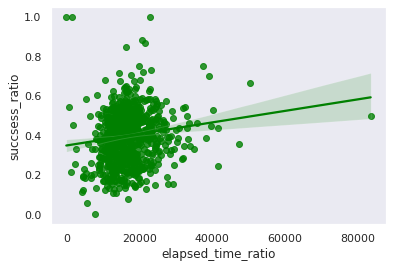

In [168]:
# Есть небольшая связь между elapsed_time_ratio и успеваемостью
sns.regplot(data = df_train_by_user_id, x = 'elapsed_time_ratio', y = 'succsess_ratio', color = 'green')

Вывод:

На успеваемоость влияют: показатель content_type_id,prior_question_elapsed_time